In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
df_2015 = pd.read_csv('2015_Call_a_bike.csv')

In [3]:
df_2015.count()

date                         4624826
BOOKING_HAL_ID               4624826
CATEGORY_HAL_ID              4624826
VEHICLE_HAL_ID               4624826
CUSTOMER_HAL_ID              4624826
DATE_BOOKING                 4624826
DATE_FROM                    4624826
DATE_UNTIL                   4624826
COMPUTE_EXTRA_BOOKING_FEE    4624826
TRAVERSE_USE                 4624826
DISTANCE                     4624826
START_RENTAL_ZONE            3647769
START_RENTAL_ZONE_HAL_ID     4473881
END_RENTAL_ZONE              3640210
END_RENTAL_ZONE_HAL_ID       4472788
RENTAL_ZONE_HAL_SRC          4583703
CITY_RENTAL_ZONE             4624826
TECHNICAL_INCOME_CHANNEL     4559244
dtype: int64

In [4]:
df_2015.head()

,date,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2015-01-01 00:14:25,27688994,51000,119878,C2E89B7C538A6FBBA6FBDFB811C616D9A1B4064D,2015-01-01 00:14:25,2015-01-01 00:14:25,2015-01-01 00:27:26,Nein,Nein,0.0,Bahnhof Dammtor Süd / Marseiller Straße,138382.0,Osterstraße/Bismarckstraße,131642.0,Standort,Hamburg,Terminal HH_18 (-2528-)
1,2015-01-01 00:26:09,27689019,51000,120624,692C95821E9ACA58259CBB699810EAA84CF0A00E,2015-01-01 00:26:09,2015-01-01 00:26:09,2015-01-01 00:43:51,Nein,Nein,0.0,Eduard-Rhein-Ufer / Schwanenwik,140800.0,Burgstraße/Hammer Landstraße,131639.0,Standort,Hamburg,Terminal HH_31 (-2321-)
2,2015-01-01 00:44:37,27689089,51000,120017,81ABD7D72CD6397F99E3C09A539AC61951D290AA,2015-01-01 00:44:37,2015-01-01 00:44:37,2015-01-01 00:45:06,Nein,Nein,0.0,Leinpfad/Fernsicht,224650.0,Leinpfad/Fernsicht,224650.0,Standort,Hamburg,Terminal HH_111 (-2316-)
3,2015-01-01 01:12:59,27689205,51000,143629,E7EF081E19AAF56F09509BE4AEFD2AED619F90B7,2015-01-01 01:12:59,2015-01-01 01:12:59,2015-01-01 01:43:09,Nein,Nein,0.0,Osterstraße/Bismarckstraße,131642.0,Hudtwalckerstraße / Bebelallee,138378.0,Standort,Hamburg,NaN
4,2015-01-01 01:27:20,27689263,51000,120391,D6FFD22F4BC5C36B3FB12193D250D6193C534C48,2015-01-01 01:27:20,2015-01-01 01:27:20,2015-01-01 01:32:32,Nein,Nein,0.0,Millerntorplatz/St.Pauli,131905.0,Sievekingplatz/Gorch-Fock-Wall,164033.0,Standort,Hamburg,Terminal HH_4 (-2612-)


In [5]:
df_2015.drop(['COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE', 'BOOKING_HAL_ID', 'CUSTOMER_HAL_ID'], axis=1, inplace=True)

In [6]:
CITY = df_2015.CITY_RENTAL_ZONE.unique()

In [7]:
category = df_2015.CATEGORY_HAL_ID.unique()

In [8]:
df_2015.head()

,date,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2015-01-01 00:14:25,51000,119878,2015-01-01 00:14:25,2015-01-01 00:14:25,2015-01-01 00:27:26,Bahnhof Dammtor Süd / Marseiller Straße,138382.0,Osterstraße/Bismarckstraße,131642.0,Standort,Hamburg,Terminal HH_18 (-2528-)
1,2015-01-01 00:26:09,51000,120624,2015-01-01 00:26:09,2015-01-01 00:26:09,2015-01-01 00:43:51,Eduard-Rhein-Ufer / Schwanenwik,140800.0,Burgstraße/Hammer Landstraße,131639.0,Standort,Hamburg,Terminal HH_31 (-2321-)
2,2015-01-01 00:44:37,51000,120017,2015-01-01 00:44:37,2015-01-01 00:44:37,2015-01-01 00:45:06,Leinpfad/Fernsicht,224650.0,Leinpfad/Fernsicht,224650.0,Standort,Hamburg,Terminal HH_111 (-2316-)
3,2015-01-01 01:12:59,51000,143629,2015-01-01 01:12:59,2015-01-01 01:12:59,2015-01-01 01:43:09,Osterstraße/Bismarckstraße,131642.0,Hudtwalckerstraße / Bebelallee,138378.0,Standort,Hamburg,NaN
4,2015-01-01 01:27:20,51000,120391,2015-01-01 01:27:20,2015-01-01 01:27:20,2015-01-01 01:32:32,Millerntorplatz/St.Pauli,131905.0,Sievekingplatz/Gorch-Fock-Wall,164033.0,Standort,Hamburg,Terminal HH_4 (-2612-)


In [9]:
print(len(CITY))
print(len(category))

47
4


In [10]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(df_2015[df_2015['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])

In [11]:
print(city_dict)

{'Hamburg': 2531919, 'Berlin': 358854, 'Frankfurt am Main': 513589, 'Kassel': 179694, 'Marburg': 107078, 'Stuttgart': 165350, 'Darmstadt': 155684, 'Rüsselsheim': 31879, 'Wiesbaden': 13250, 'Ingolstadt': 60, 'München': 343766, 'Bielefeld': 62, 'Göttingen': 224, 'Freiburg': 283, 'Karlsruhe': 347, 'Braunschweig': 83, 'Flugh. Frankfurt': 3016, 'Halle': 853, 'Köln': 213465, 'Wolfsburg': 65, 'Mannheim': 532, 'Erlangen': 46, 'Kaiserslautern': 43, 'Weimar': 101, 'Fulda': 76, 'Rostock': 42, 'Heidelberg': 350, 'Mainz': 237, 'Bonn': 296, 'Bamberg': 55, 'Würzburg': 151, 'Hanau': 58, 'Aschaffenburg': 48, 'Bremen': 276, 'Lübeck': 124, 'Hannover': 512, 'Gütersloh': 33, 'Saarbrücken': 98, 'Düsseldorf': 325, 'Oberhausen': 26, 'Oldenburg (Oldb)': 54, 'Warnemünde': 35, 'Troisdorf': 74, 'Baden-Baden': 845, 'Magdeburg': 66, 'Kiel': 798, 'Hennef': 4}


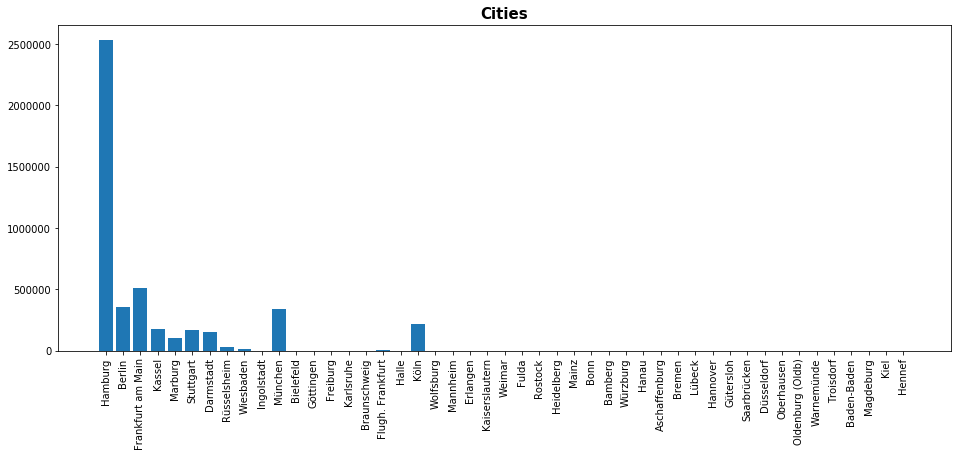

In [12]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [13]:
category_dict = {}
categories, category_count = [],[]
for c in category:
    category_dict[c] = len(df_2015[df_2015['CATEGORY_HAL_ID']==c])
    categories.append(c)
    category_count.append(category_dict[c])

In [14]:
print(category_dict)

{51000: 2531919, 50000: 1899987, 53000: 179694, 50001: 13226}


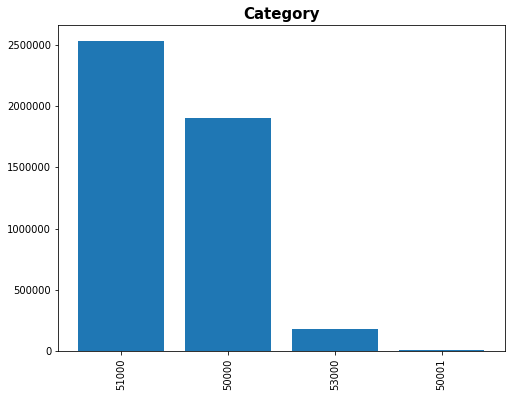

In [15]:
x_plot = np.arange(len(categories))
plt.figure(figsize=(8,6))
plt.title('Category', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, category_count)
plt.xticks(x_plot+1, categories, rotation = 'vertical')
plt.show()

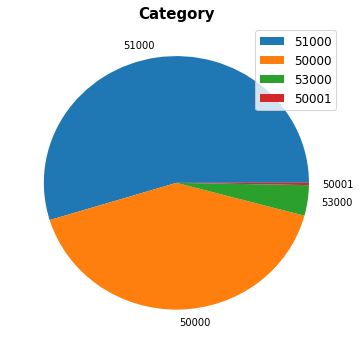

In [16]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(5,5))
plt.title('Category', fontsize=15, fontweight='bold')
plt.pie(category_count, labels=categories)
plt.legend(categories, fontsize = 'large', loc = "best")
plt.tight_layout()
plt.show()

In [17]:
del df_2015['date']
df_2015.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,51000,119878,2015-01-01 00:14:25,2015-01-01 00:14:25,2015-01-01 00:27:26,Bahnhof Dammtor Süd / Marseiller Straße,138382.0,Osterstraße/Bismarckstraße,131642.0,Standort,Hamburg,Terminal HH_18 (-2528-)
1,51000,120624,2015-01-01 00:26:09,2015-01-01 00:26:09,2015-01-01 00:43:51,Eduard-Rhein-Ufer / Schwanenwik,140800.0,Burgstraße/Hammer Landstraße,131639.0,Standort,Hamburg,Terminal HH_31 (-2321-)
2,51000,120017,2015-01-01 00:44:37,2015-01-01 00:44:37,2015-01-01 00:45:06,Leinpfad/Fernsicht,224650.0,Leinpfad/Fernsicht,224650.0,Standort,Hamburg,Terminal HH_111 (-2316-)
3,51000,143629,2015-01-01 01:12:59,2015-01-01 01:12:59,2015-01-01 01:43:09,Osterstraße/Bismarckstraße,131642.0,Hudtwalckerstraße / Bebelallee,138378.0,Standort,Hamburg,NaN
4,51000,120391,2015-01-01 01:27:20,2015-01-01 01:27:20,2015-01-01 01:32:32,Millerntorplatz/St.Pauli,131905.0,Sievekingplatz/Gorch-Fock-Wall,164033.0,Standort,Hamburg,Terminal HH_4 (-2612-)


In [18]:
df_2015['DATE_BOOKING'] = pd.to_datetime(df_2015['DATE_BOOKING'])

In [19]:
df_2015.index = df_2015['DATE_BOOKING']
df_2015.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
DATE_BOOKING,,,,,,,,,,,,
2015-01-01 00:14:25,51000,119878,2015-01-01 00:14:25,2015-01-01 00:14:25,2015-01-01 00:27:26,Bahnhof Dammtor Süd / Marseiller Straße,138382.0,Osterstraße/Bismarckstraße,131642.0,Standort,Hamburg,Terminal HH_18 (-2528-)
2015-01-01 00:26:09,51000,120624,2015-01-01 00:26:09,2015-01-01 00:26:09,2015-01-01 00:43:51,Eduard-Rhein-Ufer / Schwanenwik,140800.0,Burgstraße/Hammer Landstraße,131639.0,Standort,Hamburg,Terminal HH_31 (-2321-)
2015-01-01 00:44:37,51000,120017,2015-01-01 00:44:37,2015-01-01 00:44:37,2015-01-01 00:45:06,Leinpfad/Fernsicht,224650.0,Leinpfad/Fernsicht,224650.0,Standort,Hamburg,Terminal HH_111 (-2316-)
2015-01-01 01:12:59,51000,143629,2015-01-01 01:12:59,2015-01-01 01:12:59,2015-01-01 01:43:09,Osterstraße/Bismarckstraße,131642.0,Hudtwalckerstraße / Bebelallee,138378.0,Standort,Hamburg,NaN
2015-01-01 01:27:20,51000,120391,2015-01-01 01:27:20,2015-01-01 01:27:20,2015-01-01 01:32:32,Millerntorplatz/St.Pauli,131905.0,Sievekingplatz/Gorch-Fock-Wall,164033.0,Standort,Hamburg,Terminal HH_4 (-2612-)


In [20]:
df_month = df_2015.groupby(pd.TimeGrouper(freq='M'))

In [21]:
tem = df_month['DATE_BOOKING'].count()

In [22]:
month_name=[]
month_wise_booking=[]
for p,l in tem.items():
    month_name.append(calendar.month_abbr[p.month])
    month_wise_booking.append(l)

In [23]:
print(month_name)
print(month_wise_booking)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[162744, 165429, 245823, 396467, 479878, 559966, 585331, 584580, 433013, 396569, 332755, 282271]


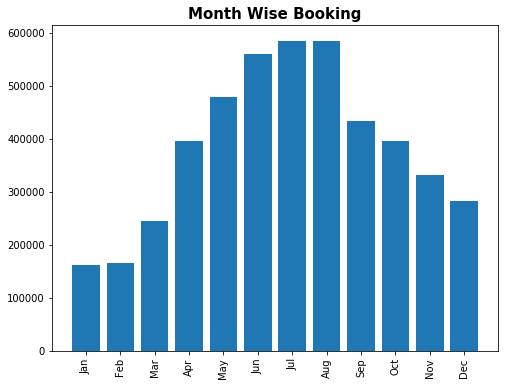

In [24]:
x_plot = np.arange(len(month_name))
plt.figure(figsize=(8,6))
plt.title('Month Wise Booking', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_wise_booking)
plt.xticks(x_plot+1, month_name, rotation = 'vertical')
plt.show()

In [25]:
df_2015.count()

CATEGORY_HAL_ID             4624826
VEHICLE_HAL_ID              4624826
DATE_BOOKING                4624826
DATE_FROM                   4624826
DATE_UNTIL                  4624826
START_RENTAL_ZONE           3647769
START_RENTAL_ZONE_HAL_ID    4473881
END_RENTAL_ZONE             3640210
END_RENTAL_ZONE_HAL_ID      4472788
RENTAL_ZONE_HAL_SRC         4583703
CITY_RENTAL_ZONE            4624826
TECHNICAL_INCOME_CHANNEL    4559244
dtype: int64

In [26]:
df = df_2015.dropna(subset = ['TECHNICAL_INCOME_CHANNEL'],how='any', axis=0)

In [27]:
df.count()

CATEGORY_HAL_ID             4559244
VEHICLE_HAL_ID              4559244
DATE_BOOKING                4559244
DATE_FROM                   4559244
DATE_UNTIL                  4559244
START_RENTAL_ZONE           3598630
START_RENTAL_ZONE_HAL_ID    4410942
END_RENTAL_ZONE             3590706
END_RENTAL_ZONE_HAL_ID      4409328
RENTAL_ZONE_HAL_SRC         4518809
CITY_RENTAL_ZONE            4559244
TECHNICAL_INCOME_CHANNEL    4559244
dtype: int64

In [28]:
channel = df['TECHNICAL_INCOME_CHANNEL']

In [29]:
channel_group = {'android':[], 'iphone': [], 'windows': [], 'other': []}
for j in channel:
    if ('Android' in j):
        channel_group['android'].append(j)
    elif ('iPhone' in j):
        channel_group['iphone'].append(j)
    elif ('Windows' in j):
        channel_group['windows'].append(j)
    else:
        channel_group['other'].append(j)

In [30]:
groups, group_count = [],[]
for i in channel_group:
    groups.append(i)
    group_count.append(len(channel_group[i]))
print(groups)
print(group_count)

['android', 'iphone', 'windows', 'other']
[1077051, 1525658, 42725, 1913810]


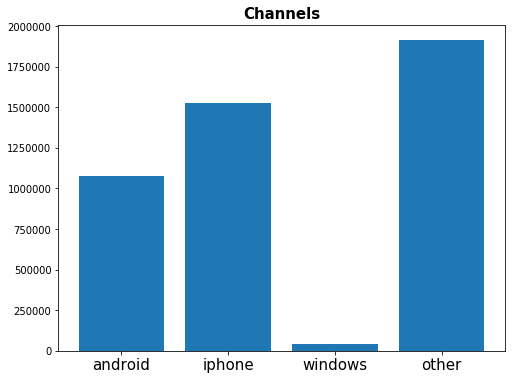

In [31]:
x_plot = np.arange(len(groups))
plt.figure(figsize=(8,6))
plt.title('Channels', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, group_count)
plt.xticks(x_plot+1, groups, fontsize=15)
plt.show()